<ipython-input-1-9a2b5b4c4cb5>:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read(filename)


Sample Rate: 44100
Speech Signal Shape: (262094,)
Auto-correlation Result Shape: (262094,)


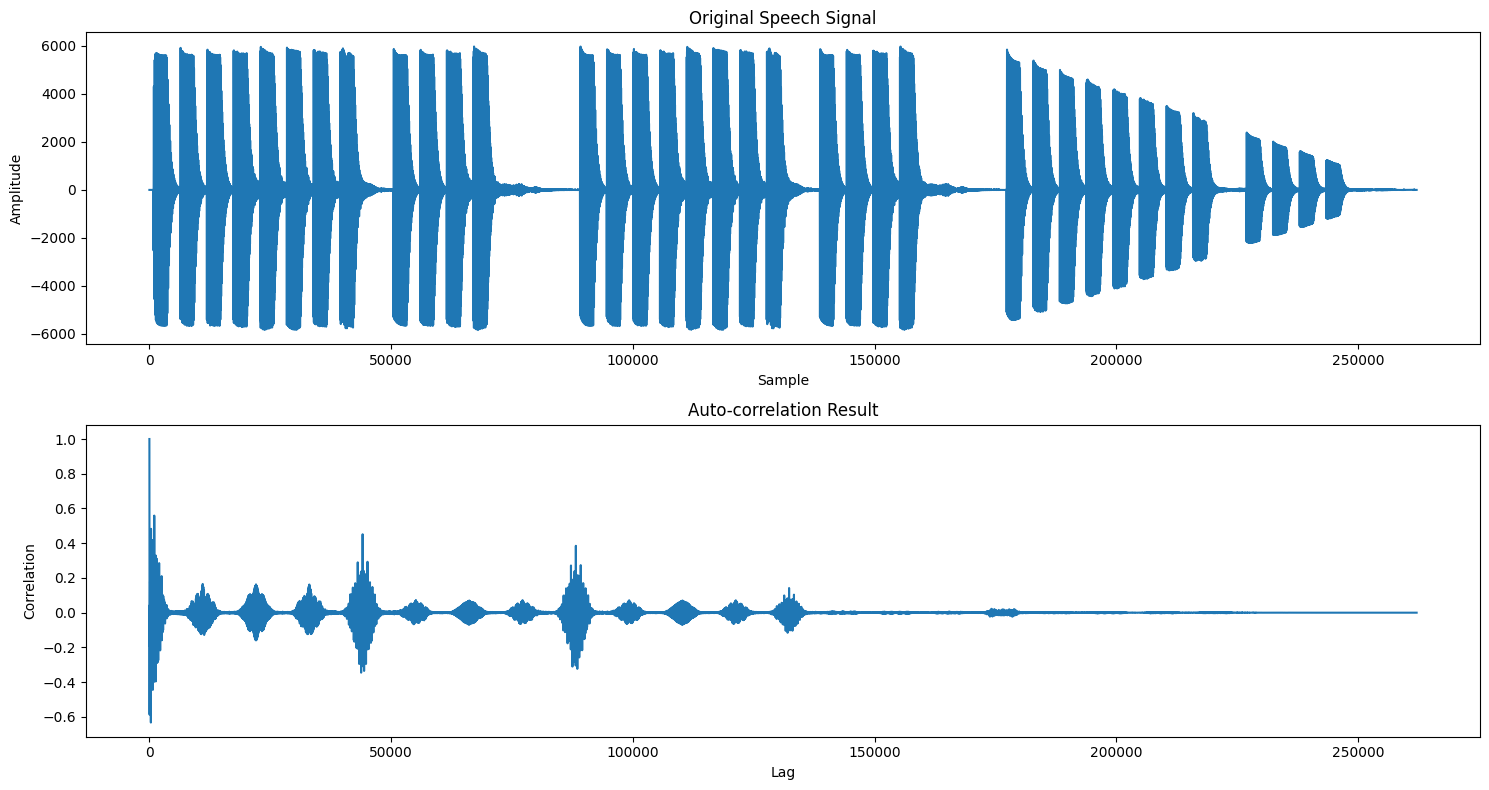

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def load_audio(filename):
    """Load an audio file."""
    sample_rate, data = wavfile.read(filename)
    if data.ndim > 1:
        # If stereo, convert to mono by averaging the channels
        data = np.mean(data, axis=1)
    return sample_rate, data

def compute_autocorrelation(signal):
    """Compute the auto-correlation of the signal."""
    # Normalize the signal
    signal = signal - np.mean(signal)
    # Compute the auto-correlation
    correlation = np.correlate(signal, signal, mode='full')
    # Normalize the correlation
    correlation /= np.max(correlation)
    # Remove the negative lags
    mid = len(correlation) // 2
    return correlation[mid:]

def plot_signals(original_signal, autocorrelation):
    """Plot the original signal and its auto-correlation result."""
    plt.figure(figsize=(15, 8))

    plt.subplot(2, 1, 1)
    plt.plot(original_signal)
    plt.title('Original Speech Signal')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

    plt.subplot(2, 1, 2)
    plt.plot(autocorrelation)
    plt.title('Auto-correlation Result')
    plt.xlabel('Lag')
    plt.ylabel('Correlation')

    plt.tight_layout()
    plt.show()

def main():
    # Load the speech signal
    sample_rate, speech_signal = load_audio('/content/example_WAV.wav')

    # Debugging output
    print(f"Sample Rate: {sample_rate}")
    print(f"Speech Signal Shape: {speech_signal.shape}")

    # Compute the auto-correlation
    autocorrelation = compute_autocorrelation(speech_signal)

    # Debugging output
    print(f"Auto-correlation Result Shape: {autocorrelation.shape}")

    # Plot the results
    plot_signals(speech_signal, autocorrelation)

if __name__ == "__main__":
    main()
